# 1. Import and Install Dependencies

In [1]:
pip install tensorflow opencv-python mediapipe matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results)

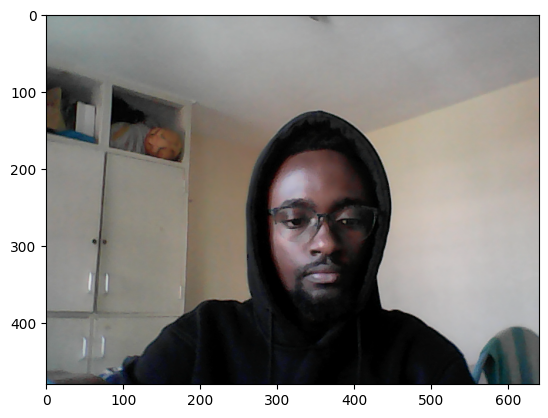

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

### Read files seperately

In [17]:
import cv2
import mediapipe as mp

# Initialize MediaPipe holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the image
image_path = r'C:\Users\MWAI MICHAEL\Downloads\dataset\train\images\ImageID_UE5KM8K7_jpg.rf.ef6866a45c1beef4ec2f206694967a42.jpg'
image = cv2.imread(image_path)

# Convert the BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and draw landmarks
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    results = holistic.process(image_rgb)

    # Draw hand landmarks
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

# Save the image with landmarks
output_image_path = 'Output.jpg'
cv2.imwrite(output_image_path, image)

True

In [13]:
import cv2
import mediapipe as mp

# Initialize MediaPipe holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Load the video
video_path = 'C:\Datasets\Dataset 6 - Elvis\Letters\J.MOV'
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
output_video_path = 'Output.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Process the video and draw landmarks
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the BGR frame to RGB
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame and draw landmarks
        results = holistic.process(image_rgb)

        # Draw hand landmarks
        mp_drawing.draw_landmarks(frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Write the frame with landmarks to the output video
        out.write(frame)

cap.release()
out.release()

### Read all files together

In [20]:
import os
import cv2
import mediapipe as mp

# Initialize MediaPipe holistic model
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Define input and output directories
input_dir = 'Dataset'
output_dir = 'Processed_Dataset'
os.makedirs(output_dir, exist_ok=True)

# Process files in the input directory
for filename in os.listdir(input_dir):
    file_path = os.path.join(input_dir, filename)
    
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        print(f"Processing image: {filename}")
        # Process image
        image = cv2.imread(file_path)

        # Convert the BGR image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image and draw landmarks
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            results = holistic.process(image_rgb)

            # Draw hand landmarks
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # Save the image with landmarks
        output_image_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_image_path, image)
        print(f"Saved processed image to: {output_image_path}")
    
    elif filename.endswith(('.mp4', '.avi', '.mov')):
        print(f"Processing video: {filename}")
        # Process video
        cap = cv2.VideoCapture(file_path)

        # Get video properties
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = cap.get(cv2.CAP_PROP_FPS)

        # Define the codec and create VideoWriter object
        output_video_path = os.path.join(output_dir, filename)
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

        # Process the video and draw landmarks
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                # Convert the BGR frame to RGB
                image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Process the frame and draw landmarks
                results = holistic.process(image_rgb)

                # Draw hand landmarks
                mp_drawing.draw_landmarks(frame, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
                mp_drawing.draw_landmarks(frame, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

                # Write the frame with landmarks to the output video
                out.write(frame)

        cap.release()
        out.release()
        print(f"Saved processed video to: {output_video_path}")

print("Processing complete.")

Processing image: A_JPG.rf.82b816826ea0525d0df8b27cc8980f62.jpg
Saved processed image to: Processed_Dataset\A_JPG.rf.82b816826ea0525d0df8b27cc8980f62.jpg
Processing image: A_JPG.rf.b8bf2fad49f0087c90da4571365e00a6.jpg
Saved processed image to: Processed_Dataset\A_JPG.rf.b8bf2fad49f0087c90da4571365e00a6.jpg
Processing image: A_JPG.rf.e229e84339ca71612f55d2e7f59e91ce.jpg
Saved processed image to: Processed_Dataset\A_JPG.rf.e229e84339ca71612f55d2e7f59e91ce.jpg
Processing image: B_JPG.rf.720ebbb2a057fcc5a5cd981854a88b4a.jpg
Saved processed image to: Processed_Dataset\B_JPG.rf.720ebbb2a057fcc5a5cd981854a88b4a.jpg
Processing image: B_JPG.rf.7d1a8997405b8b91e53dcf665100a8b8.jpg
Saved processed image to: Processed_Dataset\B_JPG.rf.7d1a8997405b8b91e53dcf665100a8b8.jpg
Processing image: B_JPG.rf.d4ff18b480ffab29ef56574f3ba0f223.jpg
Saved processed image to: Processed_Dataset\B_JPG.rf.d4ff18b480ffab29ef56574f3ba0f223.jpg
Processing image: C_JPG.rf.0907f6cc725a0d676199d497336affbc.jpg
Saved proces

# 3. Extract Keypoint Values

In [ ]:
len(results.left_hand_landmarks.landmark)

In [21]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
def extract_keypoints(results):
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

# 4. Setup Folders for Collection

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Dataset2') 

# Actions that we try to detect
actions = np.array(['church', 'mosque', 'love', 'seat', 'enough', 'temple', 'me', 'friend', 'you'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 9

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

### Extract keypoints live from the webcam

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Signsense', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Signsense', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # NEW Save the image with landmarks
                processed_image_path = os.path.join('Processed Dataset', action, str(sequence))
                os.makedirs(processed_image_path, exist_ok=True)
                image_path = os.path.join(processed_image_path, f"{frame_num}.jpg")
                cv2.imwrite(image_path, image)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

### Extract keypoints from the provided dataset

In [83]:
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for filename in os.listdir('Dataset'):
        file_path = os.path.join('Dataset', filename)
        action = filename[0].upper()
        if action not in actions:
            print(f"Skipping file {filename} as it does not match any action.")
            continue
        
        print(f"Processing file: {filename}")
        
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Process image
            image = cv2.imread(file_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = holistic.process(image_rgb)
            draw_styled_landmarks(image, results)
            keypoints = extract_keypoints(results)
            for sequence in range(no_sequences):
                npy_path = os.path.join(DATA_PATH, action, str(sequence), f"{0}.npy")
                np.save(npy_path, keypoints)
                print(f"Saved keypoints for image {filename} to {npy_path}")
            cv2.imshow('Image', image)
            cv2.waitKey(1000)

        elif filename.endswith(('.mp4', '.avi', '.mov', '.MOV')):
            # Process video
            cap = cv2.VideoCapture(file_path)
            for sequence in range(no_sequences):
                frame_num = 0
                while cap.isOpened() and frame_num < sequence_length:
                    ret, frame = cap.read()
                    if not ret:
                        break
                    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = holistic.process(image_rgb)
                    draw_styled_landmarks(frame, results)
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")
                    np.save(npy_path, keypoints)
                    print(f"Saved keypoints for video {filename}, sequence {sequence}, frame {frame_num} to {npy_path}")
                    cv2.imshow('Video', frame)
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                    frame_num += 1
            cap.release()
        
    cv2.destroyAllWindows()

Processing file: A_JPG.rf.82b816826ea0525d0df8b27cc8980f62.jpg
Saved keypoints for image A_JPG.rf.82b816826ea0525d0df8b27cc8980f62.jpg to Dataset1\A\0\0.npy
Saved keypoints for image A_JPG.rf.82b816826ea0525d0df8b27cc8980f62.jpg to Dataset1\A\1\0.npy
Saved keypoints for image A_JPG.rf.82b816826ea0525d0df8b27cc8980f62.jpg to Dataset1\A\2\0.npy
Processing file: A_JPG.rf.b8bf2fad49f0087c90da4571365e00a6.jpg
Saved keypoints for image A_JPG.rf.b8bf2fad49f0087c90da4571365e00a6.jpg to Dataset1\A\0\0.npy
Saved keypoints for image A_JPG.rf.b8bf2fad49f0087c90da4571365e00a6.jpg to Dataset1\A\1\0.npy
Saved keypoints for image A_JPG.rf.b8bf2fad49f0087c90da4571365e00a6.jpg to Dataset1\A\2\0.npy
Processing file: A_JPG.rf.e229e84339ca71612f55d2e7f59e91ce.jpg
Saved keypoints for image A_JPG.rf.e229e84339ca71612f55d2e7f59e91ce.jpg to Dataset1\A\0\0.npy
Saved keypoints for image A_JPG.rf.e229e84339ca71612f55d2e7f59e91ce.jpg to Dataset1\A\1\0.npy
Saved keypoints for image A_JPG.rf.e229e84339ca71612f55d2e7

# 6. Preprocess Data and Create Labels and Features

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'church': 0,
 'mosque': 1,
 'love': 2,
 'seat': 3,
 'enough': 4,
 'temple': 5,
 'me': 6,
 'friend': 7,
 'you': 8}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(270, 30, 126)

In [27]:
np.array(labels).shape

(270,)

In [28]:
X = np.array(sequences)

In [29]:
X.shape

(270, 30, 126)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [32]:
y_test.shape

(14, 9)

# 7. Build and Train LSTM Neural Network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [12]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Projects\signsense\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - categorical_accuracy: 0.1151 - loss: 2.1940
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.1375 - loss: 2.1458
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - categorical_accuracy: 0.2774 - loss: 2.0520
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.2353 - loss: 2.0247
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.3370 - loss: 1.7575
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.3943 - loss: 1.5442
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - categorical_accuracy: 0.3905 - loss: 1.4542
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.5215 - loss: 1.3558
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - categorical_accuracy: 0.5715 - loss: 1.1650
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - categorical_accuracy: 0.4839 - loss: 1.4251
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        48,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,973 (2.33 MB)

 Trainable params: 203,657 (795.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,316 (1.55 MB)

# 8. Make Predictions

In [19]:
res = model.predict(X_test)

NameError: name 'X_test' is not defined

In [40]:
actions[np.argmax(res[4])]

'temple'

In [41]:
actions[np.argmax(y_test[4])]

'temple'

# 9. Save Weights

In [42]:
model.save('test1.h5')

In [ ]:
model.load_weights('action.h5')

In [58]:
model = load_model('test1.h5') 

# 10. Evaluation using Confusion Matrix and Accuracy

In [13]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [45]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [46]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[11,  0],
        [ 0,  3]],

       [[12,  0],
        [ 1,  1]],

       [[11,  0],
        [ 0,  3]],

       [[13,  0],
        [ 0,  1]],

       [[11,  0],
        [ 0,  3]],

       [[13,  0],
        [ 0,  1]],

       [[12,  1],
        [ 0,  1]]], dtype=int64)

In [47]:
accuracy_score(ytrue, yhat)

0.9285714285714286

# 11. Test in Real Time

In [15]:
from scipy import stats

In [26]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


IndexError: list index out of range